In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
task = mnist.MNIST()
task.load_all_data(device)

In [29]:
X = task.X_train[[0]].cpu()
# plt.imshow(X[0,0].numpy())
# plt.show()

def image2patches(X, n_patches, patch_size=None):
    bs, c, h, w = X.shape
    
    np1, np2 = n_patches
    if patch_size is None:
        ps1, ps2 = int(h/np1), int(w/np2)
    else:
        ps1, ps2 = patch_size
    result = torch.empty(bs, np1, np2, c, ps1, ps2, device=X.device, dtype=X.dtype)
    print(result.shape)
    print(np.linspace(0, h, np1+1))
    for x in np.linspace(0, h, np1):
        for p2 in range(np2):
            print(x)
#             print(p1, np1, h*p1/np1)
#             x, y = h*(p1/np1), w*(p2/np2)
#             xb, yb = x-ps1/2, y-ps2/2
#             xa, ya = x+ps1/2, y+ps2/2
#             print(xb, yb)
#             patch = X[:, :, int(xb):int(xa), int(yb): int(ya)]
#             print(patch.shape)
#             result[:, p1, p2, :, :, :] = patch
#     return result
    
    
image2patches(X, (4, 4), )

torch.Size([1, 4, 4, 1, 7, 7])
[ 0.  7. 14. 21. 28.]
0.0
0.0
0.0
0.0
9.333333333333334
9.333333333333334
9.333333333333334
9.333333333333334
18.666666666666668
18.666666666666668
18.666666666666668
18.666666666666668
28.0
28.0
28.0
28.0


In [2]:
with open('data/big.txt', 'r') as file:
    data = file.read()

In [3]:
c = 'a'
c >= 'a' and c<='z'

True

In [11]:
datap = [c for c in data.lower() if (c >= 'a' and c<='z' or c==' ')]
# print({a for a in datap})
''.join(datap)[:1000]

'the project gutenberg ebook of the adventures of sherlock holmesby sir arthur conan doyle in our series by sir arthur conan doylecopyright laws are changing all over the world be sure to check thecopyright laws for your country before downloading or redistributingthis or any other project gutenberg ebookthis header should be the first thing seen when viewing this projectgutenberg file  please do not remove it  do not change or edit theheader without written permissionplease read the legal small print and other information about theebook and project gutenberg at the bottom of this file  included isimportant information about your specific rights and restrictions inhow the file may be used  you can also find out about how to make adonation to project gutenberg and how to get involvedwelcome to the world of free plain vanilla electronic textsebooks readable by both humans and by computers since these ebooks were prepared by thousands of volunteerstitle the adventures of sherlock holmesau

In [32]:
decoder_layer = nn.TransformerDecoderLayer(d_model=26, nhead=2, dim_feedforward=100)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)


print(np.sum([p.numel() for p in decoder_layer.parameters()]))
print(np.sum([p.numel() for p in transformer_decoder.parameters()]))

11098
66588


In [39]:
q, k, v = torch.randn(3, 9, 50, 26)
out, out_weights = list(decoder_layer.modules())[1](q, k, v)
out.shape, out_weights.shape

(torch.Size([9, 50, 26]), torch.Size([50, 9, 9]))

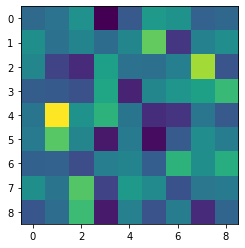

In [41]:
plt.imshow(out_weights.detach().numpy()[0])

In [51]:
from einops import rearrange, reduce, repeat

In [ ]:
def upsample_images(X, hw):
    b, c, h, w = X.shape
    nh, nw = hw
    
    nX = torch.zeros(b, c, nh, nw).to(X)
    
    return nX
    
    

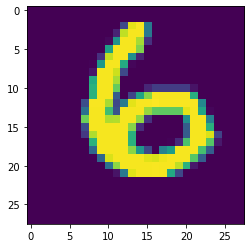

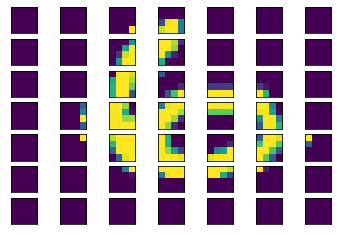

In [111]:
def patchify_images(X, n_patches):
    np1, np2 = n_patches
    b, c, h, w = X.shape
    out = rearrange(X, 'b c (np1 ps1) (np2 ps2) -> b c np1 np2 ps1 ps2', np1=np1, np2=np2)
    out = X.reshape(b, c, np1, h//np1, np2, w//np2).permute(0, 1, 2, 4, 3, 5)
#     print(out.shape)
    return out

def show_patches(X, patches):
    plt.imshow(X[0].detach().cpu().numpy())
    plt.show()
    c, h, w, _, _ = patches.shape
    
    for i in range(h):
        for j in range(w):
            plt.subplot(h, w, j+i*h+1)
            plt.imshow(patches[0, i, j].detach().cpu().numpy())
            plt.xticks([]);plt.yticks([]);
    
    

temp = patchify_images(X, (7, 7,))

show_patches(X[0], temp[0])


In [5]:
def flatten_list(a):
    ret = []
    if type(a) is list:
        for i in a:
            ret.extend(flatten_list(i))
    else:
        ret.append(a)
    return ret


In [7]:
# class MLPMixerX2(nn.Module):
#     """
#     Maps (bs, dim1*dim2) to (bs, dim1*dim2)
#     """
#     def __init__(self, dim1a, dim1b, dim2a, dim2b, num_repeats, num_repeats2):
#         super().__init__()
        
#         self.dim1, self.dim2 = dim1a*dim1b, dim2a*dim2b
#         self.flip1s = nn.ModuleList([MLPMixer(dim1a, dim1b, num_repeats2) for _ in range(num_repeats)])
#         self.flip2s = nn.ModuleList([MLPMixer(dim2a, dim2b, num_repeats2) for _ in range(num_repeats)])
        
#     def forward(self, x):
#         shape = x.shape
#         x = x.reshape(-1, self.dim2, self.dim1)
#         for f1, f2 in zip(self.flip1s, self.flip2s):
#             x = torch.relu(f1(x))
#             x = x.transpose(-1, -2)
#             x = torch.relu(f2(x))
#             x = x.transpose(-1, -2)
#         return x.reshape(shape)
    
# class MLPMixer(nn.Module):
#     """
#     Maps (bs, dim1*dim2) to (bs, dim1*dim2)
#     """
#     def __init__(self, dim1, dim2, num_repeats):
#         super().__init__()
        
#         self.dim1, self.dim2 = dim1, dim2
#         self.flip1s = nn.ModuleList([nn.Linear(dim1, dim1) for _ in range(num_repeats)])
#         self.flip2s = nn.ModuleList([nn.Linear(dim2, dim2) for _ in range(num_repeats)])
        
#     def forward(self, x):
#         shape = x.shape
#         x = x.reshape(-1, self.dim2, self.dim1)
#         for f1, f2 in zip(self.flip1s, self.flip2s):
#             x = torch.relu(f1(x))
#             x = x.transpose(-1, -2)
#             x = torch.relu(f2(x))
#             x = x.transpose(-1, -2)
#         return x.reshape(shape)

class LinearMNIST(nn.Module):
    def __init__(self, prev_layer, dim_in):
        super().__init__()
        self.prev_layer = prev_layer
        self.lin = nn.Linear(dim_in, 10)
        
        for p in self.lin.parameters():
            p.requires_grad_(False)
    def forward(self, x):
        x = self.prev_layer(x)
        x = x.reshape(len(x), -1)
        x = self.lin(x)
        return x.log_softmax(dim=-1)
    
# net = LinearMNIST(MLPMixerX2(7,4, 7, 4, 1, 1), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
# net = LinearMNIST(MLPMixer(28, 28, 1), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
# net = LinearMNIST(nn.Identity(), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
        
# net(torch.randn(3, 1, 28, 28)).shape

In [8]:
class MLPMixer(nn.Module):
    """
    Maps (bs, N) to (bs, N)
    where N = dims[0]*dims[1]
    """
    def __init__(self, dims, num_repeats):
        super().__init__()
        
        self.dims1, self.dims2 = dims
        
        self.dims1prod = np.prod(flatten_list(self.dims1))
        self.dims2prod = np.prod(flatten_list(self.dims2))
        
        self.num_repeats = num_repeats[0]
        self.num_repeats_child = num_repeats[1:]
        
        if type(self.dims1) is list:
            self.flip1s = nn.ModuleList([MLPMixer(self.dims1, self.num_repeats_child) for _ in range(self.num_repeats)])
            self.flip2s = nn.ModuleList([MLPMixer(self.dims2, self.num_repeats_child) for _ in range(self.num_repeats)])
        else:
            self.flip1s = nn.ModuleList([nn.Linear(self.dims1prod, self.dims1prod) for _ in range(self.num_repeats)])
            self.flip2s = nn.ModuleList([nn.Linear(self.dims2prod, self.dims2prod) for _ in range(self.num_repeats)])
            
        
    def forward(self, x):
        shape = x.shape
        x = x.reshape(-1, self.dims2prod, self.dims1prod)
        for f1, f2 in zip(self.flip1s, self.flip2s):
            x = torch.relu(f1(x))
            x = x.transpose(-1, -2)
            x = torch.relu(f2(x))
            x = x.transpose(-1, -2)
        return x.reshape(shape)
    
linear_params = np.sum([p.numel() for p in LinearMNIST(nn.Identity(), 16*16).parameters()])

# net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

# net = LinearMNIST(MLPMixer([[7,4], [2,14]], [1, 1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

# net = LinearMNIST(MLPMixer([[[1,7], [2,2]], [[2,1],[2,7]]], [1, 1, 1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

net = LinearMNIST(MLPMixer([16,16], [4]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

net = LinearMNIST(MLPMixer([[4, 4],[4, 4]], [2, 2]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

net = LinearMNIST(MLPMixer([[[2,2], [2,2]], [[2,2],[2,2]]], [2, 2, 4]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

2176
320
768


torch.Size([3, 10])

In [109]:
print(X_batch.shape)
rearrange(patchify_images(X_batch, (4,4)), 'b c np1 np2 ps1 ps2 -> b c (np1 np2) (ps1 ps2)').shape
# print().reshape()

torch.Size([5000, 1, 28, 28])
torch.Size([5000, 1, 4, 4, 7, 7])


torch.Size([5000, 1, 16, 49])

In [84]:
# net = LinearMNIST(MLPMixer([[[7,1],[2,2]],[[1,7],[2,2]]], [1,1,1]), 28*28)
# net = LinearMNIST(MLPMixer([[7,4],[7,4]], [2, 2]), 28*28)
net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
# net = LinearMNIST(nn.Identity(), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)
net = net.to(device)
opt = torch.optim.Adam(net.parameters(), lr=1e-2)

bs = 5000

data = []
data.append(task.calc_pheo_fitness(net, None, device, 'test'))
loop = tqdm(range(300))
for epoch_idx in loop:
    train_loader = zip(task.X_train.reshape(-1, bs, 1, 28, 28), 
                       task.Y_train.reshape(-1, bs))
    for X_batch, Y_batch in train_loader:
#         X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        Y_batch_pred = net(X_batch)
        loss = task.loss_func(Y_batch_pred, Y_batch)
        opt.zero_grad()
        loss.backward()
        opt.step()
    fit = task.calc_pheo_fitness(net, None, device, 'test')
    data.append(fit)
    loop.set_postfix(fit)
data = util.arr_dict2dict_arr(np.array(data))


1624


In [97]:
net = LinearMNIST(MLPMixer([[7,4],[7,4]], [2, 2]), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)
net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)

608
1624


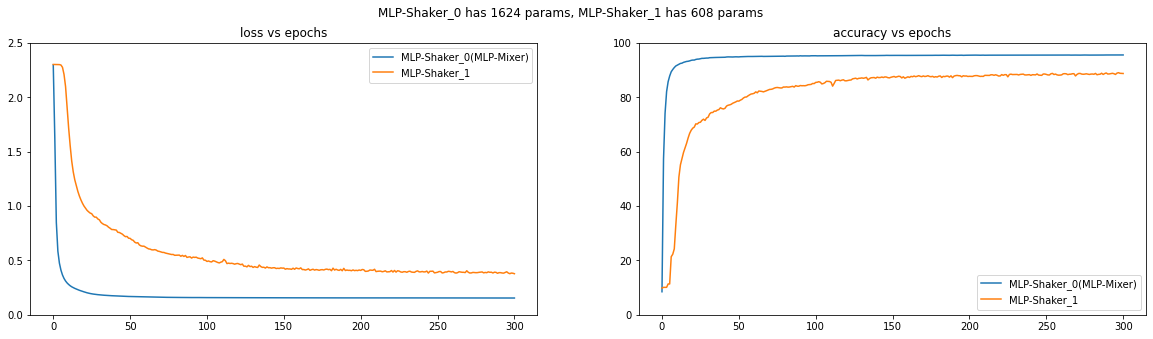

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(data_0['loss'], label='MLP-Shaker_0(MLP-Mixer)')
plt.plot(data_1['loss'], label='MLP-Shaker_1')
plt.ylim(0, 2.5)
plt.legend()
plt.title('loss vs epochs')
plt.subplot(122)
plt.plot(data_0['accuracy'], label='MLP-Shaker_0(MLP-Mixer)')
plt.plot(data_1['accuracy'], label='MLP-Shaker_1')
plt.ylim(0, 100)
plt.legend()
plt.title('accuracy vs epochs')
plt.suptitle('MLP-Shaker_0 has 1624 params, MLP-Shaker_1 has 608 params')
plt.show()